In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('Dataset/train.csv')
test = pd.read_csv('Dataset/test.csv')

In [3]:
train.shape

(6500, 10)

In [4]:
test.shape

(3500, 9)

### We are now going to choose SVM for classification as data is less and the previous logistic classifier is not good.

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 10 columns):
Won_Championship                     6500 non-null int64
Previous_SB_Wins                     6500 non-null int64
Number_Of_Wins_This_Season           6500 non-null int64
Number_Of_First_Round_Draft_Picks    6500 non-null int64
Team_Value                           6500 non-null object
Playing_Style                        6500 non-null object
Average_Player_Age                   6500 non-null int64
Number_Of_Injured_Players            6500 non-null object
Coach_Experience_Level               6500 non-null object
ID                                   6500 non-null int64
dtypes: int64(6), object(4)
memory usage: 507.9+ KB


In [6]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,0,3,13,2,Less_Than_Four_Billion,Balanced,27,five,Intermediate,6056
1,0,2,14,2,Less_Than_Four_Billion,Aggressive_Offense,26,five,Intermediate,9702
2,1,2,13,1,Less_Than_Four_Billion,Aggressive_Defense,27,four,Intermediate,1745
3,0,2,12,2,Above_Four_Billion,Balanced,27,six,Intermediate,4757
4,0,1,15,2,Less_Than_Four_Billion,Balanced,26,five,Intermediate,7242


In [7]:
test.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level,ID
0,3,16,2,Above_Four_Billion,Relaxed,26,two,Intermediate,1
1,2,15,3,Less_Than_Four_Billion,Balanced,26,six,Advanced,5
2,2,10,1,Less_Than_Four_Billion,Balanced,27,nine,Beginner,6
3,3,14,3,Less_Than_Four_Billion,Balanced,26,seven,Intermediate,7
4,3,13,2,Less_Than_Four_Billion,Balanced,27,three,Intermediate,9


In [8]:
train = train.drop('ID',axis=1)
test = test.drop('ID',axis=1)

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6500 entries, 0 to 6499
Data columns (total 9 columns):
Won_Championship                     6500 non-null int64
Previous_SB_Wins                     6500 non-null int64
Number_Of_Wins_This_Season           6500 non-null int64
Number_Of_First_Round_Draft_Picks    6500 non-null int64
Team_Value                           6500 non-null object
Playing_Style                        6500 non-null object
Average_Player_Age                   6500 non-null int64
Number_Of_Injured_Players            6500 non-null object
Coach_Experience_Level               6500 non-null object
dtypes: int64(5), object(4)
memory usage: 457.1+ KB


### Team_Value, Playing_Style, Number_Of_Injured_Players and Coach_Experience_Level are categorical and Not numeric

In [10]:
train['Team_Value'].value_counts()

Less_Than_Four_Billion     5130
Above_Four_Billion          717
Less_Than_Three_Billion     653
Name: Team_Value, dtype: int64

In [11]:
train['Playing_Style'].value_counts()

Aggressive_Defense    3204
Balanced              2908
Aggressive_Offense     223
Relaxed                165
Name: Playing_Style, dtype: int64

In [12]:
train['Number_Of_Injured_Players'].value_counts()

five     1894
six      1799
four     1069
seven     972
three     343
eight     289
two        78
nine       44
one        10
ten         2
Name: Number_Of_Injured_Players, dtype: int64

In [13]:
train['Number_Of_Injured_Players'] = train['Number_Of_Injured_Players'].map({'one':0,'two':1,'three':2,'four':3,'five':4,'six':5,
                                                                           'seven':6,'eight':7,'nine':8,'ten':9})

In [14]:
test['Number_Of_Injured_Players'] = test['Number_Of_Injured_Players'].map({'one':0,'two':1,'three':2,'four':3,'five':4,'six':5,
                                                                           'seven':6,'eight':7,'nine':8,'ten':9})

In [15]:
train['Coach_Experience_Level'].value_counts()

Intermediate    5154
Beginner         674
Advanced         672
Name: Coach_Experience_Level, dtype: int64

### Feature Selection

In [16]:
train.isna().sum()

Won_Championship                     0
Previous_SB_Wins                     0
Number_Of_Wins_This_Season           0
Number_Of_First_Round_Draft_Picks    0
Team_Value                           0
Playing_Style                        0
Average_Player_Age                   0
Number_Of_Injured_Players            0
Coach_Experience_Level               0
dtype: int64

Text(0.5, 1.0, 'Correlation between features')

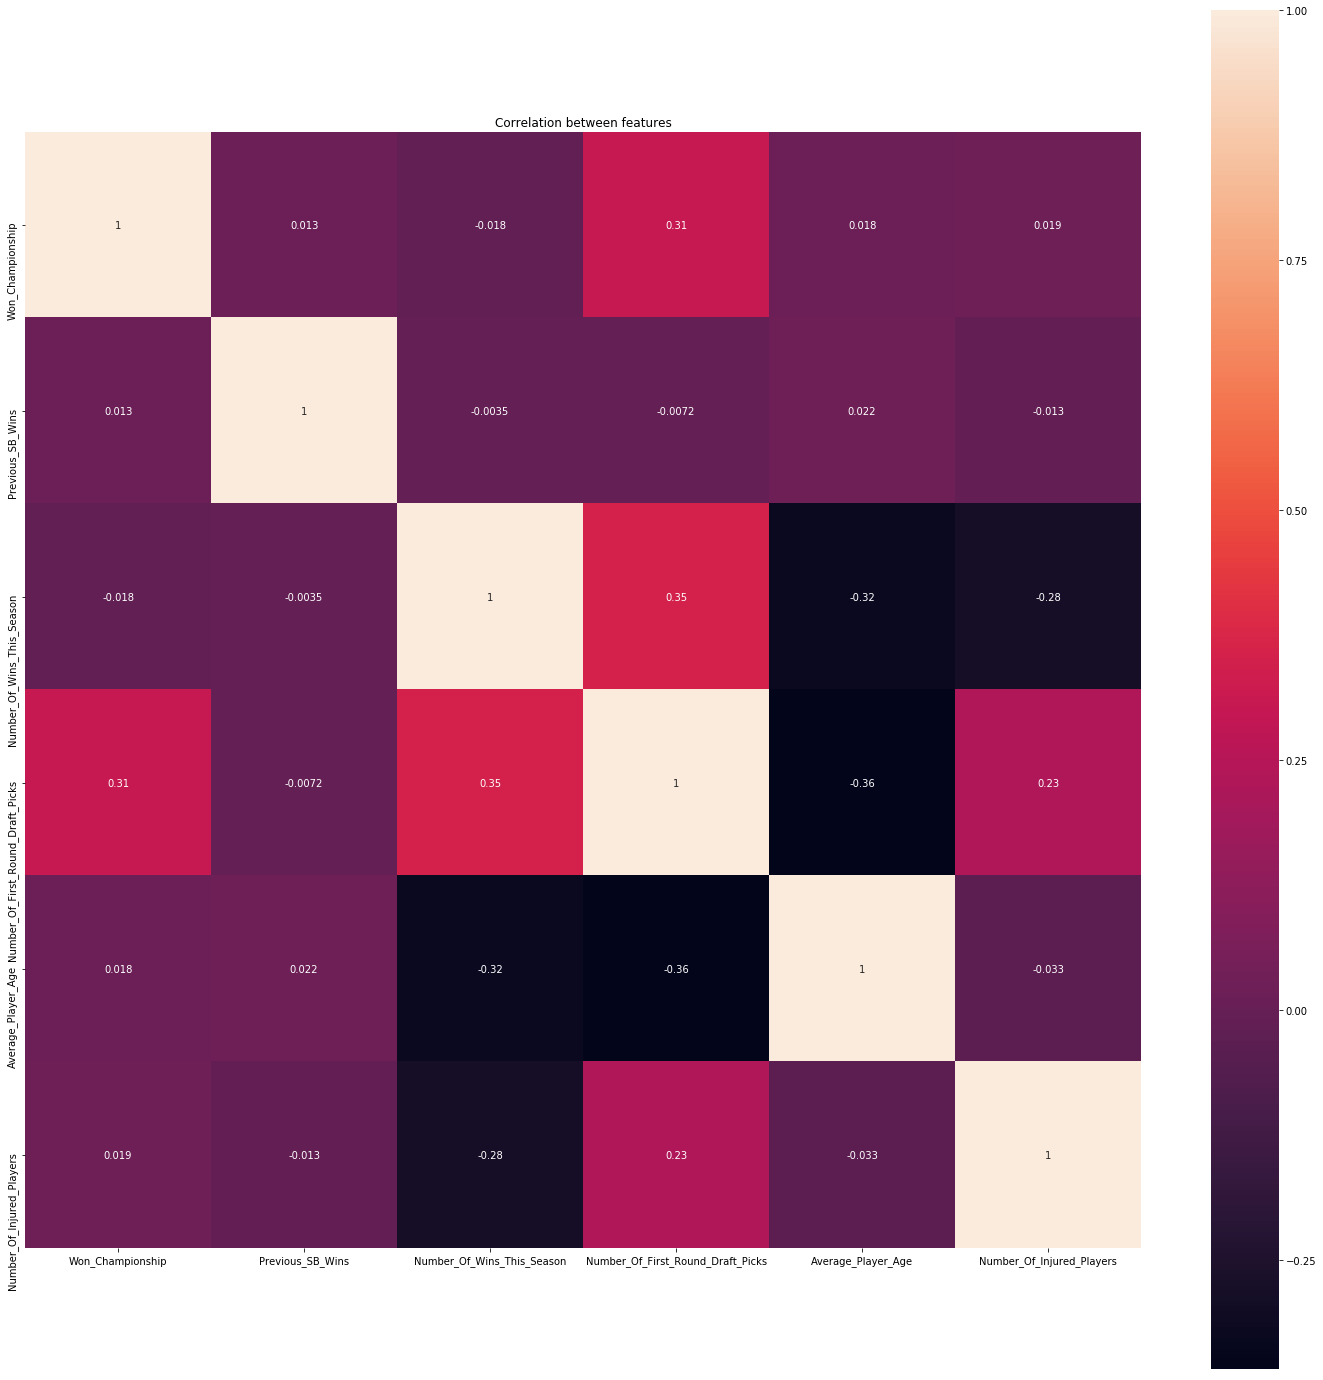

In [17]:
plt.figure(figsize=(25,25))
corr = train.corr()
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values, square=True,annot=True,linecolor="black") #cmap='YlGnBu',
plt.title("Correlation between features")

In [18]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Won_Championship,6500.0,0.500769,0.500038,0.0,0.0,1.0,1.0,1.0
Previous_SB_Wins,6500.0,1.829077,0.582494,0.0,1.0,2.0,2.0,4.0
Number_Of_Wins_This_Season,6500.0,13.926308,1.135781,10.0,13.0,14.0,15.0,18.0
Number_Of_First_Round_Draft_Picks,6500.0,2.154615,0.598970,0.0,2.0,2.0,3.0,4.0
Average_Player_Age,6500.0,26.346615,0.573036,24.0,26.0,26.0,27.0,28.0
Number_Of_Injured_Players,6500.0,4.425692,1.310832,0.0,4.0,4.0,5.0,9.0


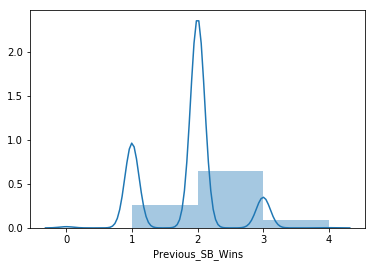

In [19]:
sns.distplot(train['Previous_SB_Wins'],bins=4)

In [20]:
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report

In [21]:
col_list_x = list(set(train.columns) - set(['Won_Championship']))
col_list_x

['Number_Of_Injured_Players',
 'Number_Of_First_Round_Draft_Picks',
 'Coach_Experience_Level',
 'Previous_SB_Wins',
 'Playing_Style',
 'Team_Value',
 'Average_Player_Age',
 'Number_Of_Wins_This_Season']

In [22]:
train = pd.get_dummies(train)

In [23]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Number_Of_Injured_Players,Team_Value_Above_Four_Billion,Team_Value_Less_Than_Four_Billion,Team_Value_Less_Than_Three_Billion,Playing_Style_Aggressive_Defense,Playing_Style_Aggressive_Offense,Playing_Style_Balanced,Playing_Style_Relaxed,Coach_Experience_Level_Advanced,Coach_Experience_Level_Beginner,Coach_Experience_Level_Intermediate
0,0,3,13,2,27,4,0,1,0,0,0,1,0,0,0,1
1,0,2,14,2,26,4,0,1,0,0,1,0,0,0,0,1
2,1,2,13,1,27,3,0,1,0,1,0,0,0,0,0,1
3,0,2,12,2,27,5,1,0,0,0,0,1,0,0,0,1
4,0,1,15,2,26,4,0,1,0,0,0,1,0,0,0,1


In [24]:
col_list_x = list(set(train.columns) - set(['Won_Championship']))
col_list_x

['Coach_Experience_Level_Beginner',
 'Number_Of_First_Round_Draft_Picks',
 'Coach_Experience_Level_Advanced',
 'Previous_SB_Wins',
 'Team_Value_Less_Than_Four_Billion',
 'Playing_Style_Aggressive_Defense',
 'Playing_Style_Balanced',
 'Average_Player_Age',
 'Playing_Style_Aggressive_Offense',
 'Number_Of_Injured_Players',
 'Coach_Experience_Level_Intermediate',
 'Team_Value_Above_Four_Billion',
 'Playing_Style_Relaxed',
 'Team_Value_Less_Than_Three_Billion',
 'Number_Of_Wins_This_Season']

In [25]:
x = train[col_list_x]
y = train['Won_Championship']

In [26]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1,random_state=0) 

In [27]:
train_x.shape

(5850, 15)

In [28]:
test_y.shape

(650,)

In [29]:
model = svm.SVC()

In [30]:
model.fit(train_x,train_y)

C:\Users\alsrivas\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [31]:
pred2 = model.predict(test_x)

In [32]:
accuracy = accuracy_score(test_y,pred2)

In [33]:
accuracy

0.7369230769230769

### k-fold cross validation

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

In [35]:
clf = svm.SVC()

In [36]:
kernal = ['linear','rbf']
C = [0.01,0.01,0.1,1,10,100,100]
gamma = [0.02,0.02,0.2,1,10,100,100]

In [37]:
gride = dict(kernel = kernal,C = C, gamma = gamma)

In [38]:
grid_clf = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)

In [39]:
x.shape

(6500, 15)

In [40]:
y.shape

(6500,)

In [41]:
grid_clf.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.01, 0.01, 0.1, 1, 10, 100, 100], 'gamma': [0.02, 0.02, 0.2, 1, 10, 100, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [42]:
print(grid_clf.best_score_)
print(grid_clf.best_params_)
print(grid_clf.best_estimator_)

0.7578461538461538
{'C': 1, 'gamma': 0.2, 'kernel': 'rbf'}
SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


In [43]:
pd.DataFrame(grid_clf.cv_results_)[['mean_test_score', 'std_test_score', 'params']]

,mean_test_score,std_test_score,params
0,0.631692,0.014036,"{'C': 0.01, 'gamma': 0.02, 'kernel': 'linear'}"
1,0.579231,0.013118,"{'C': 0.01, 'gamma': 0.02, 'kernel': 'rbf'}"
2,0.631692,0.014036,"{'C': 0.01, 'gamma': 0.02, 'kernel': 'linear'}"
3,0.579231,0.013118,"{'C': 0.01, 'gamma': 0.02, 'kernel': 'rbf'}"
4,0.631692,0.014036,"{'C': 0.01, 'gamma': 0.2, 'kernel': 'linear'}"
5,0.726000,0.003750,"{'C': 0.01, 'gamma': 0.2, 'kernel': 'rbf'}"
6,0.631692,0.014036,"{'C': 0.01, 'gamma': 1, 'kernel': 'linear'}"
7,0.501692,0.001846,"{'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}"
8,0.631692,0.014036,"{'C': 0.01, 'gamma': 10, 'kernel': 'linear'}"
9,0.500769,0.000000,"{'C': 0.01, 'gamma': 10, 'kernel': 'rbf'}"


### Choosen Model

In [63]:
classifier = svm.SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [45]:
classifier.fit(train_x,train_y)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.2, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [46]:
pred = classifier.predict(test_x)

In [47]:
accuracy = accuracy_score(test_y,pred)

In [48]:
print(accuracy*100)

74.3076923076923


In [49]:
confusion_matrix(test_y,pred)

array([[241,  84],
       [ 83, 242]], dtype=int64)

In [50]:
print(classification_report(test_y,pred))

              precision    recall  f1-score   support

           0       0.74      0.74      0.74       325
           1       0.74      0.74      0.74       325

   micro avg       0.74      0.74      0.74       650
   macro avg       0.74      0.74      0.74       650
weighted avg       0.74      0.74      0.74       650



In [51]:
print('f1-score is {}'.format(0.74))

f1-score is 0.74


### Result on CSV

In [52]:
test.head()

,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Team_Value,Playing_Style,Average_Player_Age,Number_Of_Injured_Players,Coach_Experience_Level
0,3,16,2,Above_Four_Billion,Relaxed,26,1,Intermediate
1,2,15,3,Less_Than_Four_Billion,Balanced,26,5,Advanced
2,2,10,1,Less_Than_Four_Billion,Balanced,27,8,Beginner
3,3,14,3,Less_Than_Four_Billion,Balanced,26,6,Intermediate
4,3,13,2,Less_Than_Four_Billion,Balanced,27,2,Intermediate


In [53]:
test = pd.get_dummies(test)

In [54]:
test.shape

(3500, 15)

In [55]:
test = test[col_list_x]

In [56]:
answer = classifier.predict(test)

In [57]:
answer.shape

(3500,)

In [58]:
check = pd.read_csv('Dataset/test.csv')
x = check['ID']

In [59]:
answer_dict = {}
for i in range(3500):
    answer_dict[x[i]]= answer[i]

In [60]:
print(len(answer_dict.keys()))

3500


In [61]:
sorted_answer=[['ID','Won_Championship']]
for key in (answer_dict):
    sorted_answer.append([key,answer_dict[key]])

In [62]:
import csv
with open('resultV1.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerows(sorted_answer)

### One Refined Model

In [64]:
type(train)

pandas.core.frame.DataFrame

In [65]:
train.head()

,Won_Championship,Previous_SB_Wins,Number_Of_Wins_This_Season,Number_Of_First_Round_Draft_Picks,Average_Player_Age,Number_Of_Injured_Players,Team_Value_Above_Four_Billion,Team_Value_Less_Than_Four_Billion,Team_Value_Less_Than_Three_Billion,Playing_Style_Aggressive_Defense,Playing_Style_Aggressive_Offense,Playing_Style_Balanced,Playing_Style_Relaxed,Coach_Experience_Level_Advanced,Coach_Experience_Level_Beginner,Coach_Experience_Level_Intermediate
0,0,3,13,2,27,4,0,1,0,0,0,1,0,0,0,1
1,0,2,14,2,26,4,0,1,0,0,1,0,0,0,0,1
2,1,2,13,1,27,3,0,1,0,1,0,0,0,0,0,1
3,0,2,12,2,27,5,1,0,0,0,0,1,0,0,0,1
4,0,1,15,2,26,4,0,1,0,0,0,1,0,0,0,1


In [66]:
train.shape

(6500, 16)

In [67]:
train = train.drop('Previous_SB_Wins',axis=1)

In [68]:
train.shape

(6500, 15)

In [69]:
y = train['Won_Championship']

In [70]:
train = train.drop('Won_Championship',axis=1)

In [71]:
train.shape

(6500, 14)

In [72]:
x = train[train.columns]

In [73]:
x.shape

(6500, 14)

## Grid Serach 

In [74]:
clf2 = svm.SVC()

In [75]:
kernal = ['linear','rbf']
C = [0.001,0.01,0.01,0.1,1,10,100,100,1000]
gamma = [0.002,0.02,0.02,0.2,1,10,100,100,1000]

In [76]:
gride = dict(kernel = kernal,C = C, gamma = gamma)

In [77]:
grid_clf2 = GridSearchCV(clf, param_grid = gride, cv=5, scoring='accuracy', return_train_score=False, n_jobs=-1)

In [78]:
x.shape

(6500, 14)

In [79]:
y.shape

(6500,)

In [80]:
grid_clf2.fit(x, y)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid={'kernel': ['linear', 'rbf'], 'C': [0.001, 0.01, 0.01, 0.1, 1, 10, 100, 100, 1000], 'gamma': [0.002, 0.02, 0.02, 0.2, 1, 10, 100, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
       scoring='accuracy', verbose=0)

In [81]:
print(grid_clf2.best_score_)
print(grid_clf2.best_params_)
print(grid_clf2.best_estimator_)

0.7578461538461538
{'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)


#### Choosen Model

In [82]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size=0.1,random_state=0)

In [91]:
classifier2 = svm.SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [92]:
classifier2.fit(train_x,train_y)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [93]:
pred_final = classifier2.predict(test_x)

In [94]:
accuracy_final = accuracy_score(test_y,pred_final)

In [95]:
print(accuracy_final*100)

75.07692307692308


In [99]:
confusion_matrix(test_y,pred_final)

array([[238,  87],
       [ 75, 250]], dtype=int64)

In [101]:
print(classification_report(test_y,pred_final))

              precision    recall  f1-score   support

           0       0.76      0.73      0.75       325
           1       0.74      0.77      0.76       325

   micro avg       0.75      0.75      0.75       650
   macro avg       0.75      0.75      0.75       650
weighted avg       0.75      0.75      0.75       650



In [102]:
print('f1-score is {}'.format(0.75))

f1-score is 0.75


### Output CSV

In [103]:
test.shape

(3500, 15)

In [104]:
test.head()

,Coach_Experience_Level_Beginner,Number_Of_First_Round_Draft_Picks,Coach_Experience_Level_Advanced,Previous_SB_Wins,Team_Value_Less_Than_Four_Billion,Playing_Style_Aggressive_Defense,Playing_Style_Balanced,Average_Player_Age,Playing_Style_Aggressive_Offense,Number_Of_Injured_Players,Coach_Experience_Level_Intermediate,Team_Value_Above_Four_Billion,Playing_Style_Relaxed,Team_Value_Less_Than_Three_Billion,Number_Of_Wins_This_Season
0,0,2,0,3,0,0,0,26,0,1,1,1,1,0,16
1,0,3,1,2,1,0,1,26,0,5,0,0,0,0,15
2,1,1,0,2,1,0,1,27,0,8,0,0,0,0,10
3,0,3,0,3,1,0,1,26,0,6,1,0,0,0,14
4,0,2,0,3,1,0,1,27,0,2,1,0,0,0,13


In [105]:
test = test.drop('Previous_SB_Wins',axis=1)

In [106]:
test.shape

(3500, 14)

In [107]:
pred_test = classifier2.predict(test)

In [108]:
check = pd.read_csv('Dataset/test.csv')
X = check['ID']

In [109]:
answer_dict = {}
for i in range(3500):
    answer_dict[X[i]]= answer[i]

In [110]:
sorted_answer=[['ID','Won_Championship']]
for key in (answer_dict):
    sorted_answer.append([key,answer_dict[key]])

In [111]:
import csv
with open('resultActual.csv','w',newline='') as f:
    writer = csv.writer(f)
    writer.writerows(sorted_answer)